In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

model.save("fashion_model.h5")


c:\Users\negovin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8200 - loss: 0.4988 - val_accuracy: 0.8638 - val_loss: 0.3669
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8801 - loss: 0.3302 - val_accuracy: 0.8967 - val_loss: 0.2996
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8989 - loss: 0.2808 - val_accuracy: 0.8997 - val_loss: 0.2681
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9063 - loss: 0.2509 - val_accuracy: 0.8997 - val_loss: 0.2748
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9190 - loss: 0.2225 - val_accuracy: 0.8998 - val_loss: 0.2719
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9251 - loss: 0.2035 - val_accuracy: 0.9078 - val_loss: 0.2601
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9321 - loss: 0.1811 - val_accuracy: 0.9132 - val_loss: 0.2389
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9390 - loss: 0.1635 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted: Coat
Confidence: 72.14%


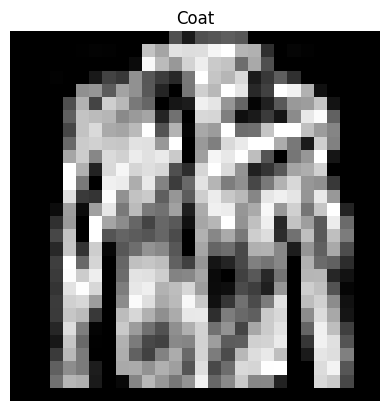

In [2]:
class_names = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

fashion_model = load_model("fashion_model.h5")

sample_image = x_test[17].reshape(1,28,28,1)
prediction = fashion_model.predict(sample_image)

pred_class = np.argmax(prediction)
confidence = np.max(prediction) * 100

print("Predicted:", class_names[pred_class])
print(f"Confidence: {confidence:.2f}%")

plt.imshow(x_test[17].reshape(28,28), cmap="gray")
plt.title(class_names[pred_class])
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


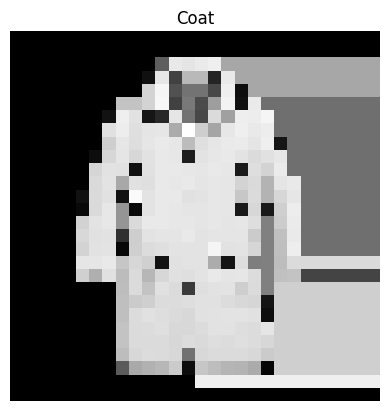

In [4]:
img = image.load_img(
    "coat2.jpg",
    color_mode="grayscale",
    target_size=(28, 28)
)

img_array = image.img_to_array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

prediction = fashion_model.predict(img_array)
pred_class = np.argmax(prediction)

plt.imshow(img, cmap="gray")
plt.title(class_names[pred_class])
plt.axis("off")
plt.show()
